# Final Project: Spaceship Titanic
DATS 6202 - Machine Learning I

Author: Alonso Romero

## Table of Contents

* [Introduction](#introduction)
* [Data Preprocessing](#datapreprocessing)
  * [Loading the Data](#dp-load)
  * [Splitting the Data](#dp-split)
  * [Handling Identifiers](#dp-id)
  * [Handling Missing Data](#dp-missing)
  * [Encoding the Data](#dp-encode)
  * [Splitting the Feature and Target](#dp-target)
  * [Scaling the Data](#dp-scale)
  * [Handling Class Imbalance](#dp-imbalance)
* [Exploratory Data Analysis](#eda)
* [Machine Learning Modeling](#modeling)
  * [Logistic Regression](#ml-logit)
  * [Decision Tree Classifier](#ml-tree)
  * [Random Forest Classifier](#ml-rf)
  * [Gradient Boosting Classifier](#ml-gbc)
  * [XGBoost Classifier](#ml-xgb)
  * [Support Vector Machine](#ml-svm)
  * [K-Nearest Neighbors](#ml-knn)
  * [MLP Classifier](#ml-mlpc)
* [Model Evaluation](#eval)
  * [Hyperparameter Tuning](#hpt)
* [Model Selection](#select)

## Introduction
<a id = "introduction"></a>

The data come from a Kaggle Competition from the following address: https://www.kaggle.com/competitions/spaceship-titanic/data

<ins><b>Dataset Description</b></ins>

In this competition your task is to predict whether a passenger was transported to an alternate dimension during 
    the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a 
    set of personal records recovered from the ship's damaged computer system.

<ins><b>File and Data Feature Descriptions</b></ins>
    
<ins>train.csv</ins> - Personal records for about two-thirds (~8700) of passengers, to be used as training data:
        
> `PassengerId`:  A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the     passenger is traveling with and pp is their number within the group. People in a group are often family members, but not always.   
>
> `HomePlanet`: The planet the passenger departed from, typically their planet of permanent residence.
>        
> `CryoSleep`: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
>         
> `Cabin`: The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
>        
> `Destination`: The planet the passenger will be debarking to.
>        
> `Age`: The age of the passenger.
>        
> `VIP`: Whether the passenger has paid for the special VIP service during the voyage.
>        
> `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
>        
> `Name`: The first and last names of the passenger.
>        
> `Transported`: Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<ins>test.csv</ins> - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

### Problem

According to Howard et al. (2022):

> Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.
>
> The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.
>
> While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!
>
> To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.
>
> Help save them and change history!

### Motivation
> We need to provide a machine learning model to predict which passengers were transported. No one wants to be lost in space, so we need to predict those passengers transported so that we can retrieve them and save their lives.

## Data Preprocessing
<a id = "datapreprocessing"></a>


### Loading the data
<a id = "dp-load"></a>

In [7]:
#  Import libraries
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.exceptions import FitFailedWarning
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Random seed
random_seed = 42
np.random.seed(random_seed)

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=FitFailedWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Imported all the necessary libraries to run all the functions in order to perform the analysis. I have also assigned the random seed as the value 42 to ensure that each test of the program is consistent. I have also suppressed the following warnings to keep the terminal outputs clean and only provide the information I want to be displayed.

Next, I will assign the raw training dataframe and raw test dataframe to their corresponding data sets through Pandas. Then I created a deep copy of the training and test dataframes to ensure that any changes made to these new dataframes do not affect the raw dataframes.

In [8]:
train_data_raw = pd.read_csv('train.csv')
test_data_raw = pd.read_csv('test.csv')

# make a copy of the raw data
df_train = train_data_raw.copy(deep=True)
df_test = test_data_raw.copy(deep=True)

# print the dimension of the training dataset
print("Dimensions of the training data")
print(pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns']))

# print the dimension of the test dataset
print("\nDimensions of the test data")
print(pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns']))


Dimensions of the training data
   # rows  # columns
0    8693         14

Dimensions of the test data
   # rows  # columns
0    4277         13


We can see that the training data has more rows than the test data set. This provides us more data for the machine learning model to learn from and better predict the transported variable in the test data in which we are seeking the answer to.

In [10]:

# print the first 5 rows of the training dataset
print("\nFirst 5 rows of the training data")
print(df_train.head())

# print the first 5 rows of the test dataset
print("\nFirst 5 rows of the test data")
print(df_test.head())

# Get the name of the target
target = 'Transported'


First 5 rows of the training data
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3

I will check the first five rows of both dataframes to see if the data is being read properly as well as see the data that I will be working with. For the test data set we are looking for which individuals have been transported, I will assign the target variable as `Transported`.

### Splitting the Data
<a id = "dp-split"></a>

I will now have to split the training dataframe into training and validation dataframes, where 70% of the original training dataframe will remain as training, and the remaining 30% will be considered as the validation dataframe to validate the training dataframe.

In [11]:
# divide the test data into training (70%) and validation (30%)
df_train, df_val = train_test_split(df_train, train_size=0.70, random_state=random_seed)

# reset the index
df_train, df_val, df_test = df_train.reset_index(drop=True), df_val.reset_index(drop=True), df_test.reset_index(drop=True)

# print the dimension of df_train
print(pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns']))

# print the dimension of df_val
print(pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns']))

# print the dimension of df_test
print(pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns']))

   # rows  # columns
0    6085         14
   # rows  # columns
0    2608         14
   # rows  # columns
0    4277         13


Looking at the dimensions of the training and validation dataframes, we can confirm that the training dataframe contains more rows than the validation dataframe. 

### Handling Identifiers
<a id = "dp-id"></a>

The following will check each dataframe if it contains an identifier feature.

In [12]:
# identifying identifiers

def id_checker(df, dtype='float'):
    """
    The identifier checker

    Parameters
    ----------
    df : dataframe
    dtype : the data type identifiers cannot have, 'float' by default

    Returns
    ----------
    The dataframe of identifiers
    """

    df_id = df[[var for var in df.columns
                if (df[var].dtype != dtype
                    and df[var].nunique(dropna=True) == df[var].notnull().sum())]]
    return df_id

# check for identifiers
df_train_id = id_checker(df_train)
df_val_id = id_checker(df_val)
df_test_id = id_checker(df_test)

# print the identifiers in each of the datasets
print(df_train_id)
print(df_val_id)
print(df_test_id)


     PassengerId
0        3282_03
1        8276_02
2        1911_01
3        1808_01
4        6995_01
...          ...
6080     6076_01
6081     5537_01
6082     5756_06
6083     0925_01
6084     7775_01

[6085 rows x 1 columns]
     PassengerId
0        0337_02
1        2891_01
2        8998_01
3        1771_01
4        9034_02
...          ...
2603     1592_01
2604     1175_01
2605     6684_01
2606     3787_03
2607     0684_01

[2608 rows x 1 columns]
     PassengerId
0        0013_01
1        0018_01
2        0019_01
3        0021_01
4        0023_01
...          ...
4272     9266_02
4273     9269_01
4274     9271_01
4275     9273_01
4276     9277_01

[4277 rows x 1 columns]


From the results of the `id_checker` function, the only identifier found from all the dataframes is the `PassengerId` feature. 

In [13]:

# Dropping the PassengerId feature as it is an identifier
df_train.drop(columns=np.intersect1d(df_train_id.columns, df_train.columns), inplace=True)
df_val.drop(columns=np.intersect1d(df_val_id.columns, df_val.columns), inplace=True)
df_test.drop(columns=np.intersect1d(df_test_id.columns, df_test.columns), inplace=True)

# Dropping the name feature
df_train.drop(columns='Name', inplace=True)
df_val.drop(columns='Name', inplace=True)
df_test.drop(columns='Name', inplace=True)

# print the first 5 rows of each of the dataframes
print(df_train.head())
print(df_val.head())
print(df_test.head())

  HomePlanet CryoSleep     Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False   B/120/S  TRAPPIST-1e  43.0  False          0.0   
1     Europa      True   C/273/P  TRAPPIST-1e  23.0  False          0.0   
2      Earth     False   G/300/S  TRAPPIST-1e  46.0  False          8.0   
3      Earth     False   F/346/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1334/S  55 Cancri e  24.0  False          0.0   

   FoodCourt  ShoppingMall   Spa  VRDeck  Transported  
0     1440.0           0.0  85.0   150.0         True  
1        0.0           0.0   0.0     0.0         True  
2      652.0           0.0   5.0    90.0        False  
3      763.0           8.0   2.0    30.0        False  
4       58.0         618.0   0.0    41.0        False  
  HomePlanet CryoSleep     Cabin  Destination   Age    VIP  RoomService  \
0       Mars     False    F/63/S  TRAPPIST-1e  19.0  False        417.0   
1      Earth     False   G/460/S  TRAPPIST-1e  18.0  False     

I dropped the `PassengerId` from all three dataframes, along with the `Name` feature as it is not going to be needed for training purposes. To verify that the two features have been removed, I used the `head()` function to view the dataframe.

### Handling Missing Data
<a id = 'dp-missing'></a>

The following will check to see if there are any null values in the dataframes.

In [14]:
# print out any presence of null values in each of the dataframes
print("\nBEFORE: Check for missing values in training data ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df_train.isnull().sum())

print("\nBEFORE: Check for missing values in validation data ~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df_val.isnull().sum())

print("\nBEFORE: Check for missing values in test data ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df_test.isnull().sum())



BEFORE: Check for missing values in training data ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HomePlanet      140
CryoSleep       154
Cabin           142
Destination     122
Age             129
VIP             153
RoomService     114
FoodCourt       122
ShoppingMall    146
Spa             122
VRDeck          129
Transported       0
dtype: int64

BEFORE: Check for missing values in validation data ~~~~~~~~~~~~~~~~~~~~~~~~~~~
HomePlanet      61
CryoSleep       63
Cabin           57
Destination     60
Age             50
VIP             50
RoomService     67
FoodCourt       61
ShoppingMall    62
Spa             61
VRDeck          59
Transported      0
dtype: int64

BEFORE: Check for missing values in test data ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64


Before dropping the null values from both dataframes, we see that in all of the dataframes there are multiple features with null values present.

In [15]:

# assign the feature Age to age_column
age_column = ['Age']

# assign the categorical features
categorical_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
# assign the passenger expense features separately from the numerical features
passenger_expense_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# impute missing age data with the average age in each of the dataframes
imputer_age = SimpleImputer(strategy='mean')
df_train[age_column] = imputer_age.fit_transform(df_train[age_column])
df_val[age_column] = imputer_age.transform(df_val[age_column])
df_test[age_column] = imputer_age.transform(df_test[age_column])

# impute missing categorical data values with the most frequent value 
imputer_category = SimpleImputer(strategy='most_frequent')
df_train[categorical_columns] = imputer_category.fit_transform(df_train[categorical_columns])
df_val[categorical_columns] = imputer_category.transform(df_val[categorical_columns])
df_test[categorical_columns] = imputer_category.transform(df_test[categorical_columns])

# impute missing expense values with a value of 0 because of the assumption of no value results in no expense incurred
df_train[passenger_expense_columns] = df_train[passenger_expense_columns].fillna(0)
df_val[passenger_expense_columns] = df_val[passenger_expense_columns].fillna(0)
df_test[passenger_expense_columns] = df_test[passenger_expense_columns].fillna(0)

# verify that there are no null values present in the dataframes after imputation
print("\nAFTER: Check for missing values in training data ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df_train.isnull().sum())

print("\nAFTER: Check for missing values in validation data ~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df_val.isnull().sum())

print("\nAFTER: Check for missing values in test data ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df_test.isnull().sum())


AFTER: Check for missing values in training data ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

AFTER: Check for missing values in validation data ~~~~~~~~~~~~~~~~~~~~~~~~~~~
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

AFTER: Check for missing values in test data ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


To resolve the null values in the dataframes, I have imputed appropriate values into the features that contains null values. For the `age` feature, the average age is imputed. For the categorical features, the most frequent value is imputed. Finally for the expense features, I imputed a value of zero as I assume the passenger has not spent money on the selected service. To check if the values were properly imputed, I checked to see if there were any null values remaining.

### Encoding the Data
<a id = 'dp-encode'></a>

In [16]:
# function that will split the cabin feature into three separate features by splitting the string
def split_cabin_feat(cabin):
    if isinstance(cabin, str):
        deck, num, side = cabin.split('/')
        return deck, num, side
    # if there is no value within the cabin feature, return as unknown
    return 'Unknown', 'Unknown', 'Unknown'

# assign the new features based on the output from the above function to all the dataframes
df_train['CabinDeck'], df_train['CabinNum'], df_train['CabinSide'] = zip(*df_train['Cabin'].map(split_cabin_feat))
df_val['CabinDeck'], df_val['CabinNum'], df_val['CabinSide'] = zip(*df_val['Cabin'].map(split_cabin_feat))
df_test['CabinDeck'], df_test['CabinNum'], df_test['CabinSide'] = zip(*df_test['Cabin'].map(split_cabin_feat))

# drop unnecessary features from the dataframes
df_train = df_train.drop(columns=['Cabin'])
df_val = df_val.drop(columns=['Cabin'])
df_test = df_test.drop(columns=['Cabin'])

# encoding categorical data with LabelEncoder
Label_encoder = LabelEncoder()
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']:
    df_train[col] = Label_encoder.fit_transform(df_train[col])
    df_val[col] = Label_encoder.transform(df_val[col])
    df_test[col] = Label_encoder.transform(df_test[col])

print(df_train.head())
print(df_val.head())
print(df_test.head())

   HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           1          0            2  43.0    0          0.0     1440.0   
1           1          1            2  23.0    0          0.0        0.0   
2           0          0            2  46.0    0          8.0      652.0   
3           0          0            2  33.0    0          0.0      763.0   
4           0          0            0  24.0    0          0.0       58.0   

   ShoppingMall   Spa  VRDeck  Transported  CabinDeck CabinNum  CabinSide  
0           0.0  85.0   150.0         True          1      120          1  
1           0.0   0.0     0.0         True          2      273          0  
2           0.0   5.0    90.0        False          6      300          1  
3           8.0   2.0    30.0        False          5      346          1  
4         618.0   0.0    41.0        False          5     1334          1  
   HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0          

For the cabin feature, it contains a string with the `/` delimiter separating out the values. I have split the string values in the cabin feature in order to produce three different features: `CabinDeck`, `CabinNum`, and `CabinSide`. Once these features are created and populated, the `Cabin` feature is dropped from all the dataframes. Finally, all the categorical features are encoded to display numerical values instead of strings to better understand the data and prepare it for modeling later.

### Splitting the Feature and Target
<a id = 'dp-target'></a>

In [17]:
# split the data into features and target
X_train = df_train.drop(columns=[target])
# assign X_val with the validation dataframe
X_val = df_val.drop(columns=[target])
# assign X_test with the test dataframe
X_test = df_test

# assign y_train with the target
y_train = df_train[target]
y_val = df_val[target]

Here I am creating the `X_train`, `X_val`, and `X_test` variables, where the target feature is dropped from the `X_train` and `X_val` features and is used in the new variables `y_train` and `y_val`.

### Scaling the Data
<a id = 'dp-scale'></a>

In [18]:
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Min-Max Normalization
mms = MinMaxScaler()

X_mms_train = mms.fit_transform(X_train[numerical_columns])
X_mms_val = mms.transform(X_val[numerical_columns])
X_mms_test = mms.transform(X_test[numerical_columns])

# Standardization
ss = StandardScaler()

X_train[numerical_columns] = ss.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = ss.transform(X_val[numerical_columns])
X_test[numerical_columns] = ss.transform(X_test[numerical_columns])

Here I initialize the `MinMaxScaler` object to normalize the numerical columns of the dataframes where it is used to compute the minimum and maximum values for scaling. Then I initialized the `StandardScaler` object to standardize the numerical columns of all the dataframes.

### Handling Class Imbalance
<a id = 'dp-imbalance'></a>

In [19]:
print(pd.Series(y_train).value_counts())

Transported
True     3059
False    3026
Name: count, dtype: int64


Looking at the target variable and how it is distributed in the training data, both boolean values are very close to each other, so no balancing functions are needed in the data.

## Exploratory Data Analysis
<a id = 'eda'></a>

<ins>Training Information</ins>

In [20]:
print('\nTraining information')
print(df_train.info())


Training information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6085 entries, 0 to 6084
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6085 non-null   int64  
 1   CryoSleep     6085 non-null   int64  
 2   Destination   6085 non-null   int64  
 3   Age           6085 non-null   float64
 4   VIP           6085 non-null   int64  
 5   RoomService   6085 non-null   float64
 6   FoodCourt     6085 non-null   float64
 7   ShoppingMall  6085 non-null   float64
 8   Spa           6085 non-null   float64
 9   VRDeck        6085 non-null   float64
 10  Transported   6085 non-null   bool   
 11  CabinDeck     6085 non-null   int64  
 12  CabinNum      6085 non-null   object 
 13  CabinSide     6085 non-null   int64  
dtypes: bool(1), float64(6), int64(6), object(1)
memory usage: 624.1+ KB
None


Looking at the `df_train` information, we see that it contains one boolean feature, six float features, six integer features, and one object feature.

<ins>Validation Information</ins>

In [21]:
print('\nValidation information')
print(df_val.info())


Validation information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    2608 non-null   int64  
 1   CryoSleep     2608 non-null   int64  
 2   Destination   2608 non-null   int64  
 3   Age           2608 non-null   float64
 4   VIP           2608 non-null   int64  
 5   RoomService   2608 non-null   float64
 6   FoodCourt     2608 non-null   float64
 7   ShoppingMall  2608 non-null   float64
 8   Spa           2608 non-null   float64
 9   VRDeck        2608 non-null   float64
 10  Transported   2608 non-null   bool   
 11  CabinDeck     2608 non-null   int64  
 12  CabinNum      2608 non-null   object 
 13  CabinSide     2608 non-null   int64  
dtypes: bool(1), float64(6), int64(6), object(1)
memory usage: 267.6+ KB
None


Looking at the `df_val` information, we see that it contains one boolean feature, six float features, six integer features, and one object feature.

<ins>Test Information</ins>

In [22]:
print('\nTest information')
print(df_test.info())


Test information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int64  
 1   CryoSleep     4277 non-null   int64  
 2   Destination   4277 non-null   int64  
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   int64  
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  CabinDeck     4277 non-null   int64  
 11  CabinNum      4277 non-null   object 
 12  CabinSide     4277 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 434.5+ KB
None


Looking at the `df_test` information, we see that it contains six float features, six integer features, and one object feature.

<ins>Descriptive Statistics for Training Data</ins>

In [23]:
print('\nNumerical Feature Summary (df_train)')
print(df_train.describe())

print('\nObject Feature Summary (df_train)')
print(df_train.describe(include='object'))


Numerical Feature Summary (df_train)
        HomePlanet    CryoSleep  Destination          Age          VIP  \
count  6085.000000  6085.000000  6085.000000  6085.000000  6085.000000   
mean      0.644536     0.341824     1.490879    28.853593     0.022843   
std       0.792193     0.474360     0.816169    14.354294     0.149415   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     1.000000    20.000000     0.000000   
50%       0.000000     0.000000     2.000000    27.000000     0.000000   
75%       1.000000     1.000000     2.000000    37.000000     0.000000   
max       2.000000     1.000000     2.000000    79.000000     1.000000   

        RoomService     FoodCourt  ShoppingMall           Spa        VRDeck  \
count   6085.000000   6085.000000   6085.000000   6085.000000   6085.000000   
mean     223.993591    461.472473    168.790797    309.949219    302.560887   
std      684.060528   1602.873269    617.000402   1118.930

Here we take a look at the descriptive statistics of the training data for both numerical features and an object feature.

<ins>Distribution of the Target Variable</ins>

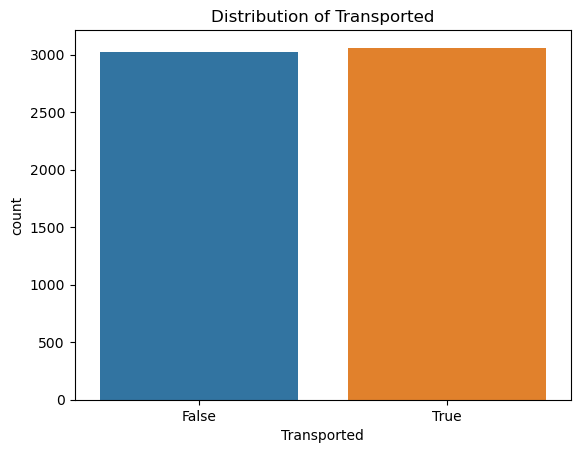

In [17]:
sns.countplot(x='Transported', data=df_train)
plt.title('Distribution of Transported')
plt.show()

Visually seeing the distribution of the `Transported` feature, we see that both boolean variables are both very close to each other, giving us balanced data to train with.

<ins>Histograms for Numerical Features</ins>

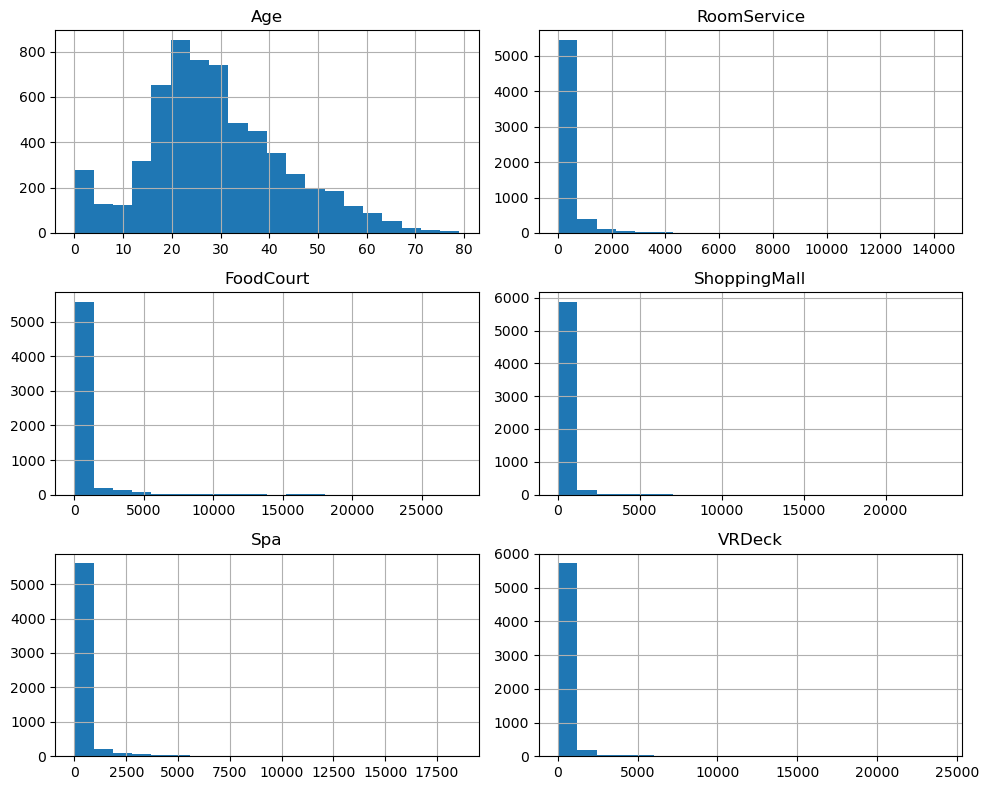

In [18]:
df_train[numerical_columns].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

We can see that the ages of the passengers heavily focus between the 20s and 30s, and the passenger expenses on services have mainly remained low across all the passengers.

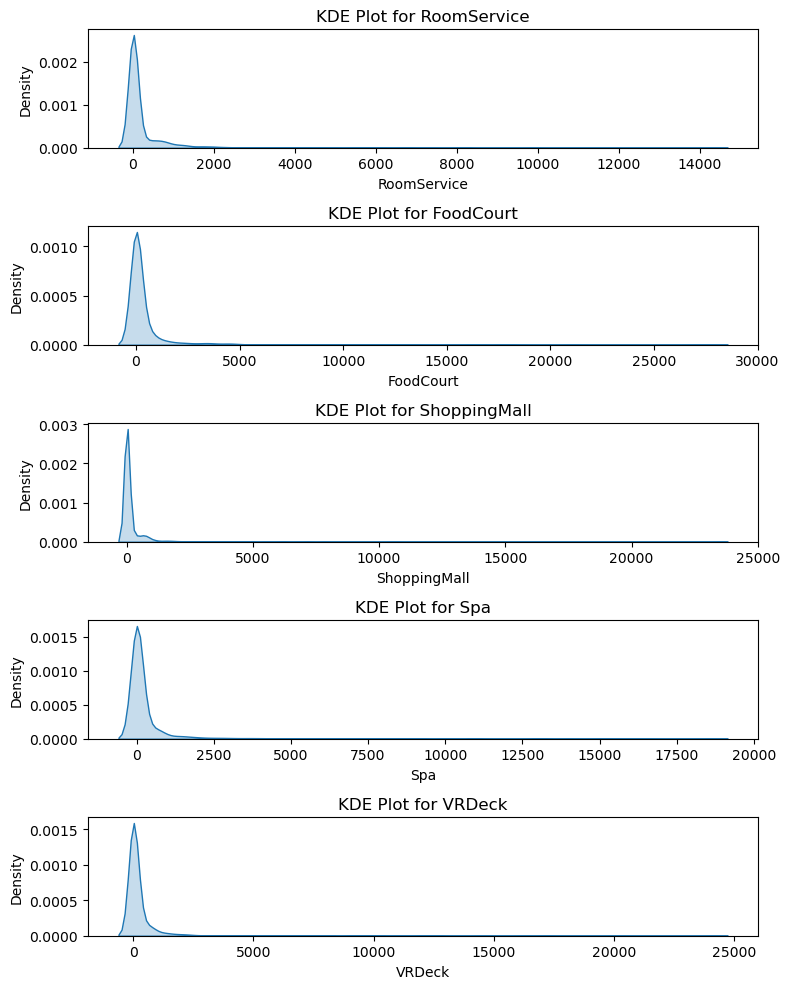

In [19]:
# create the figure with subplots
fig, axs = plt.subplots(nrows=len(passenger_expense_columns), ncols=1, figsize=(8, 10))
# iterate through each column and create separate kde plots
for i, col in enumerate(passenger_expense_columns):
    sns.kdeplot(data=df_train[col], shade=True, ax=axs[i])

# set the title for each plot
for i, col in enumerate(passenger_expense_columns):
    axs[i].set_title(f'KDE Plot for {col}')

plt.tight_layout()
plt.show()

Here we can see in detail the density of the amount of debt each passenger is from services offered onboard. Majority of the passengers owe nothing to services and a small selection of passengers owe money.

<ins>Bar Charts for Categorical Features</ins>

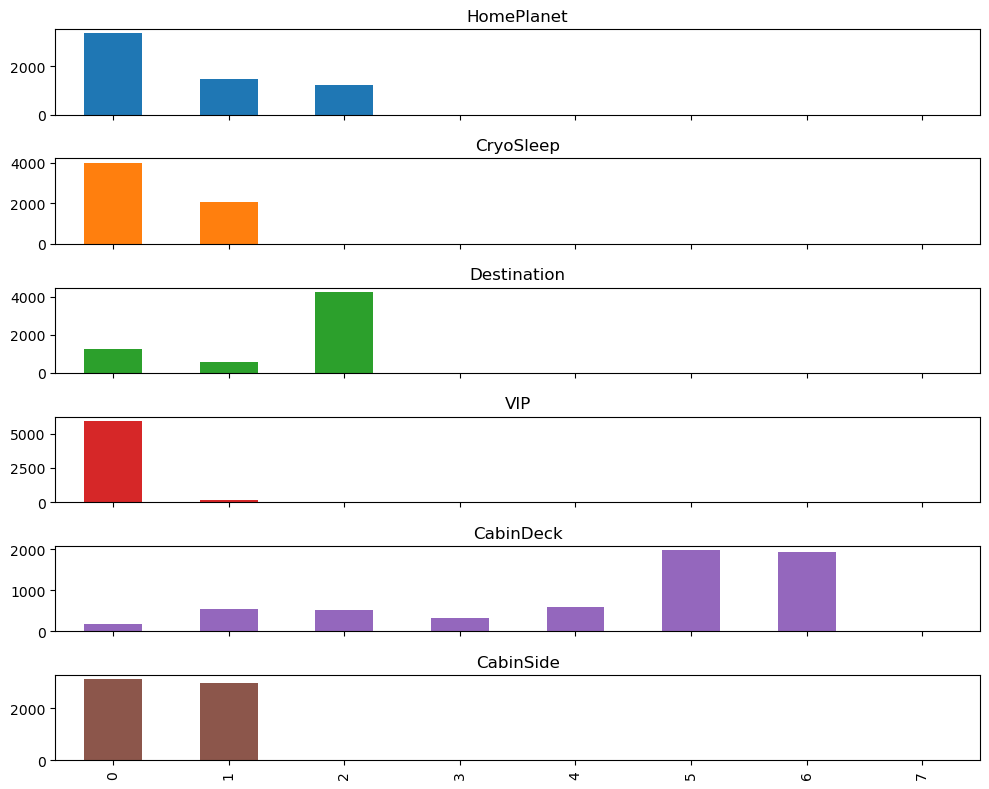

In [20]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']

categorical_counts = df_train[categorical_columns].apply(lambda x: x.value_counts())

categorical_counts.plot(kind='bar', figsize=(10, 8), subplots=True, layout=(len(categorical_columns), 1), legend=False)

plt.tight_layout()
plt.show()


Here we see the distribution of passengers according to their `HomePlanet`, if they been put to `CryoSleep`, the `Destination` they are travelling to, whether they are a `VIP` or not, and their location on the spaceship based on `CabinDeck` and `CabinSide`.

<ins>Correlation Matrix</ins>

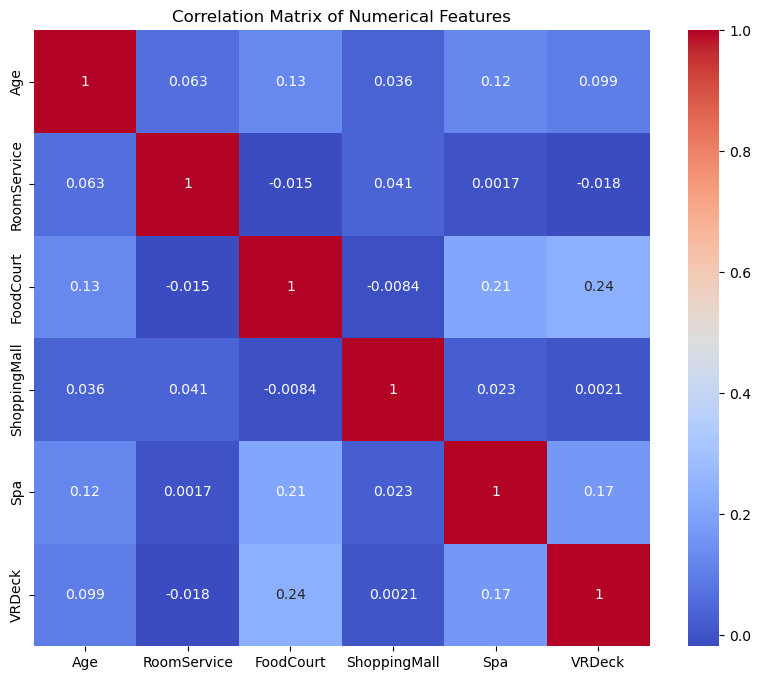

In [21]:
corr_matrix = df_train[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Here we see a correlation matrix of the numerical features. There appears to be a weak relationship of all features across the matrix as they mainly hover around 0.

<ins>Analyzing Relationships Between Features and Target</ins>

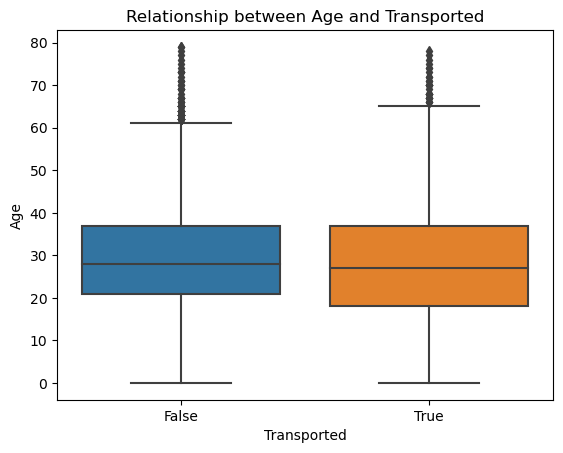

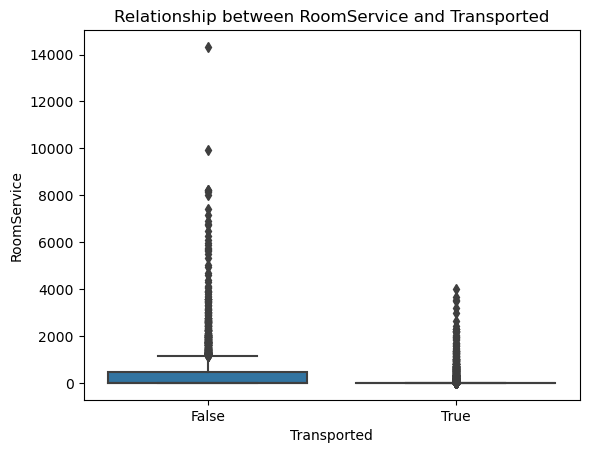

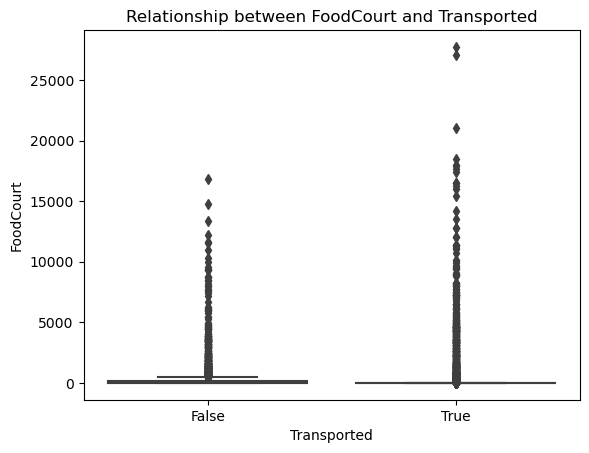

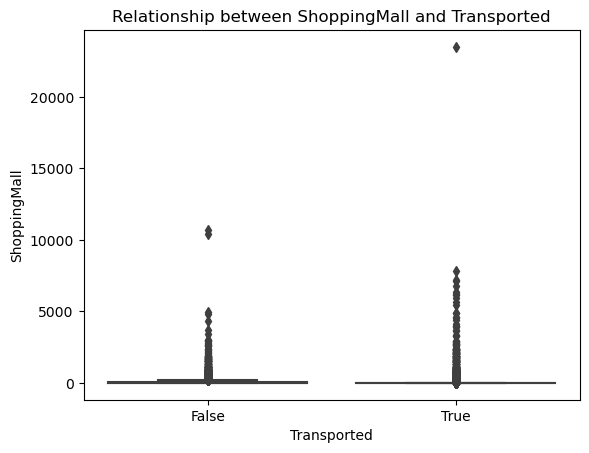

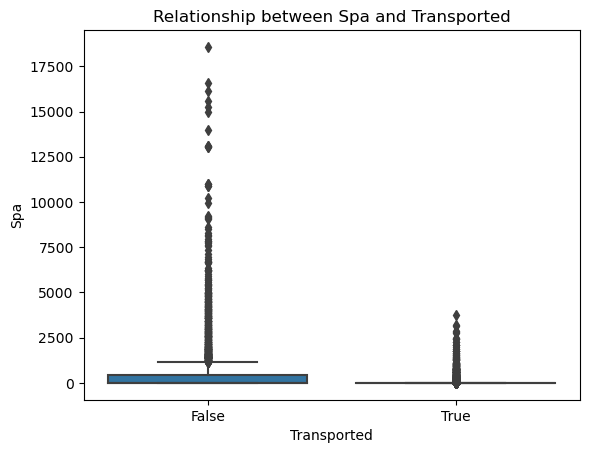

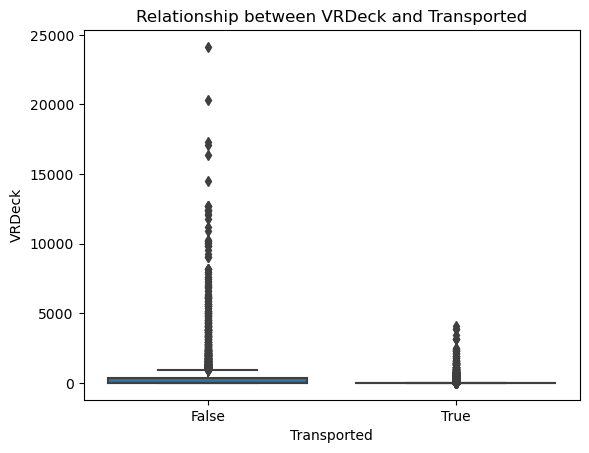

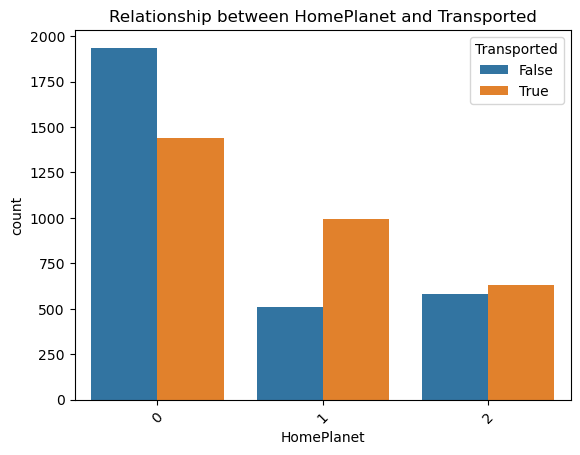

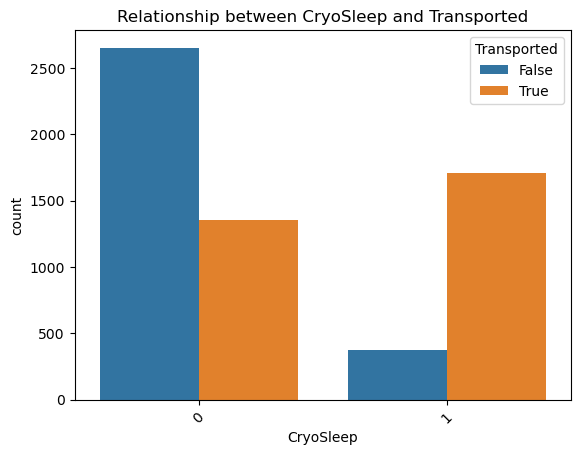

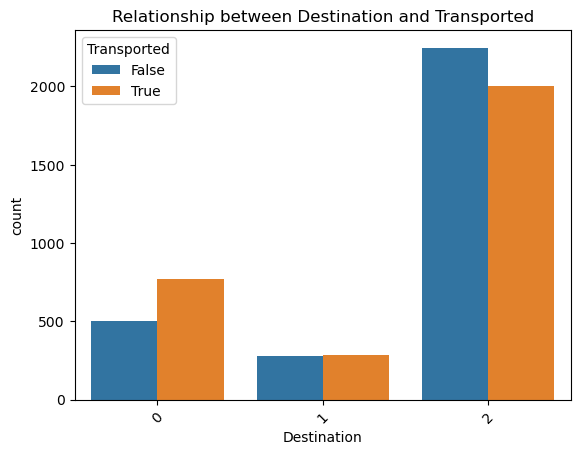

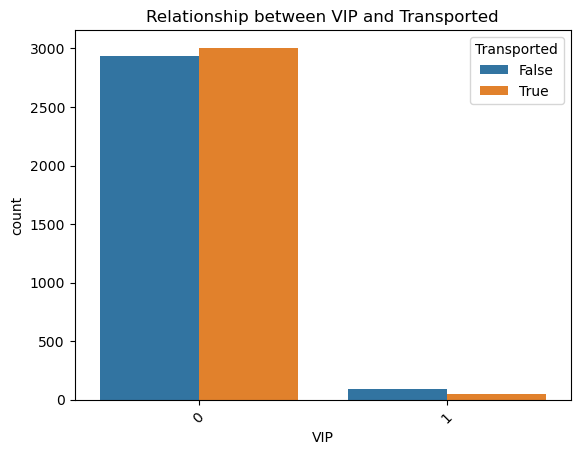

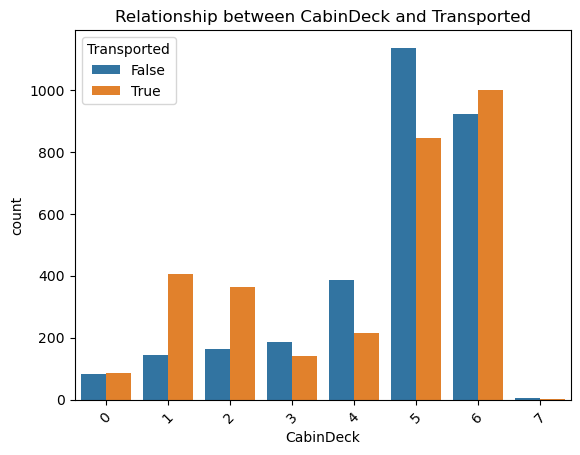

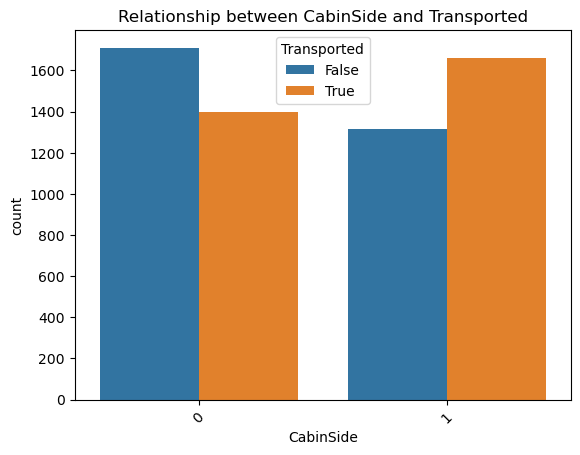

In [22]:
for col in numerical_columns:
    sns.boxplot(x='Transported', y=col, data=df_train)
    plt.title(f'Relationship between {col} and Transported')
    plt.show()

for col in categorical_columns:
    sns.countplot(x=col, hue='Transported', data=df_train)
    plt.title(f'Relationship between {col} and Transported')
    plt.xticks(rotation=45)
    plt.show()

Here we see the relationship of each feature compared to the target feature, `Transported`.

## Machine Learning Modeling
<a id = "modeling"></a>

### Logistic Regression
<a id = 'ml-logit'></a>

Logit Regression Accuracy: 0.7726226993865031
              precision    recall  f1-score   support

       False       0.79      0.73      0.76      1289
        True       0.76      0.81      0.78      1319

    accuracy                           0.77      2608
   macro avg       0.77      0.77      0.77      2608
weighted avg       0.77      0.77      0.77      2608


Logit Regression Confusion Matrix:
 [[ 942  347]
 [ 246 1073]]

Logit Regression AUC-ROC: 0.8649634070525017


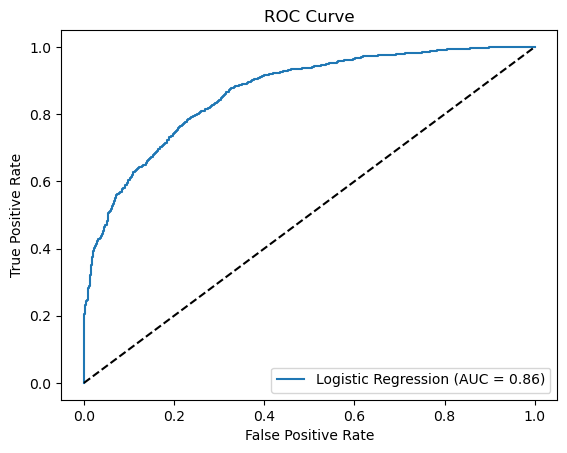

In [23]:
# initialize and train the model
logit_model = LogisticRegression(max_iter=10000, random_state=random_seed)
logit_model.fit(X_train, y_train)

# make predictions
y_pred = logit_model.predict(X_val)

logit_accuracy = accuracy_score(y_val, y_pred)

y_pred_proba_logit = logit_model.predict_proba(X_val)[:, 1]
logit_auc = roc_auc_score(y_val, y_pred_proba_logit)

print("Logit Regression Accuracy:", logit_accuracy)
print(classification_report(y_val, y_pred))
print("\nLogit Regression Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nLogit Regression AUC-ROC:", logit_auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_logit)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Decision Tree Classifier
<a id = 'ml-tree'></a>


Decision Tree Accuracy: 0.7565184049079755
              precision    recall  f1-score   support

       False       0.77      0.73      0.75      1289
        True       0.75      0.78      0.76      1319

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.76      0.76      2608


Decision Tree Confusion Matrix:
 [[ 943  346]
 [ 289 1030]]

Decision Tree AUC: 0.7561497502339444


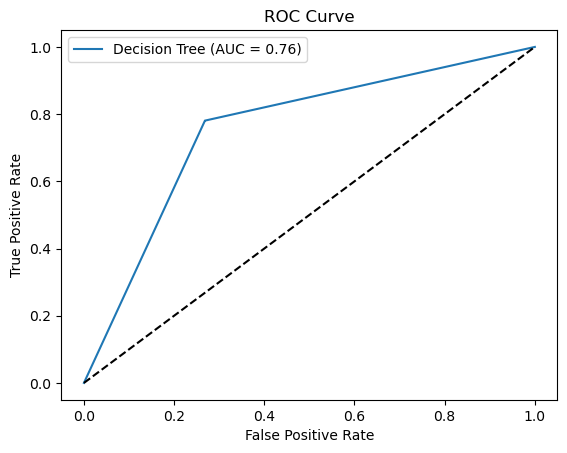

In [24]:
# initialize and train the model
tree = DecisionTreeClassifier(random_state=random_seed)
tree.fit(X_train, y_train)

# make predictions
y_pred = tree.predict(X_val)

y_pred_proba_tree = tree.predict_proba(X_val)[:, 1]
tree_auc = roc_auc_score(y_val, y_pred_proba_tree)

tree_accuracy = accuracy_score(y_val, y_pred)
print("\nDecision Tree Accuracy:", tree_accuracy)
print(classification_report(y_val, y_pred))
print("\nDecision Tree Confusion Matrix:\n",confusion_matrix(y_val, y_pred))
print("\nDecision Tree AUC:", tree_auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_tree)

plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {tree_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Random Forest Classifier
<a id = 'ml-rf'></a>


Random Forest Accuracy: 0.7940950920245399
              precision    recall  f1-score   support

       False       0.78      0.81      0.80      1289
        True       0.81      0.78      0.79      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608


Random Forest Confusion Matrix:
 [[1046  243]
 [ 294 1025]]

Random Forest AUC-ROC: 0.8744223443130801


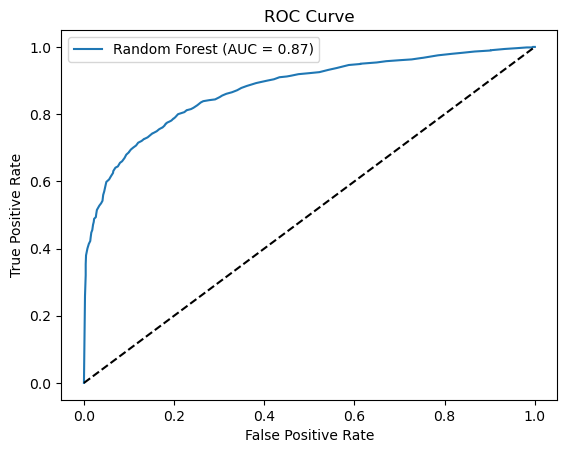

In [25]:
# initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf.fit(X_train, y_train)

# make predictions
y_pred = rf.predict(X_val)

y_pred_proba_rf = rf.predict_proba(X_val)[:, 1]
rf_auc = roc_auc_score(y_val, y_pred_proba_rf)

rf_accuracy = accuracy_score(y_val, y_pred)
print("\nRandom Forest Accuracy:", rf_accuracy)
print(classification_report(y_val, y_pred))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nRandom Forest AUC-ROC:", rf_auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_rf)

plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Gradient Boosting Classifier
<a id = 'ml-gbc'></a>


Gradient Boosting Accuracy: 0.7921779141104295
              precision    recall  f1-score   support

       False       0.82      0.74      0.78      1289
        True       0.77      0.84      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608


Gradient Boosting Confusion Matrix:
 [[ 959  330]
 [ 212 1107]]

Gradient Boosting AUC: 0.8884278295791473


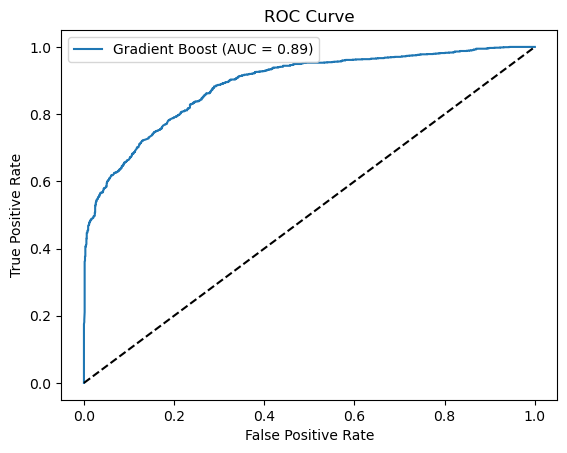

In [26]:
# initialize and train the model
gbc = GradientBoostingClassifier(n_estimators=100, random_state=random_seed)
gbc.fit(X_train, y_train)

# make predictions
y_pred = gbc.predict(X_val)

y_pred_proba_gbc = gbc.predict_proba(X_val)[:, 1]
gbc_auc = roc_auc_score(y_val, y_pred_proba_gbc)

gbc_accuracy = accuracy_score(y_val, y_pred)
print("\nGradient Boosting Accuracy:", gbc_accuracy)
print(classification_report(y_val, y_pred))
print("\nGradient Boosting Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nGradient Boosting AUC:", gbc_auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_gbc)

plt.plot(fpr, tpr, label=f'Gradient Boost (AUC = {gbc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### XGBoost Classifier
<a id = 'ml-xgb'></a>


XGBoost Accuracy: 0.7825920245398773
              precision    recall  f1-score   support

       False       0.78      0.78      0.78      1289
        True       0.78      0.79      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608


XGBoost Confusion Matrix:
 [[ 999  290]
 [ 277 1042]]

XGBoost AUC: 0.8768885378172216


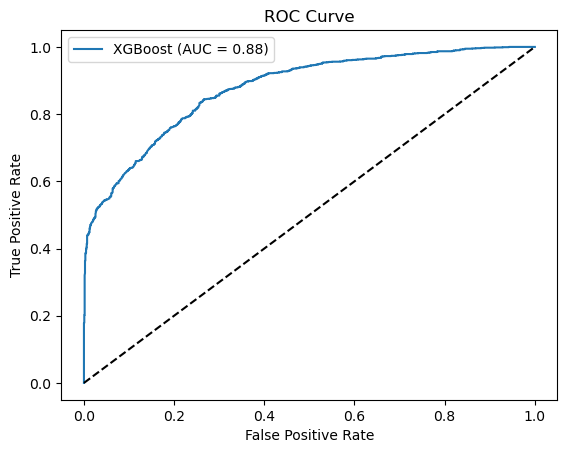

In [27]:

# Convert 'CabinNum' and other object columns to 'category'
X_train['CabinNum'] = X_train['CabinNum'].astype('category')
X_val['CabinNum'] = X_val['CabinNum'].astype('category')

# If test set is used, do the same for test set
X_test['CabinNum'] = X_test['CabinNum'].astype('category')

# Initialize XGBoost with enable_categorical set to True
xgb = XGBClassifier(enable_categorical=True, random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_val)

y_pred_proba_xgb = xgb.predict_proba(X_val)[:, 1]
xgb_auc = roc_auc_score(y_val, y_pred_proba_xgb)

xgb_accuracy = accuracy_score(y_val, y_pred)
print("\nXGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_val, y_pred))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nXGBoost AUC:", xgb_auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_xgb)

plt.plot(fpr, tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='roc_auc')

X_train['CabinNum'] = X_train['CabinNum'].astype('object')
X_val['CabinNum'] = X_val['CabinNum'].astype('object')

### Support Vector Machine
<a id = 'ml-svm'></a>


SVM Accuracy: 0.5437116564417178
              precision    recall  f1-score   support

       False       0.54      0.54      0.54      1289
        True       0.55      0.54      0.55      1319

    accuracy                           0.54      2608
   macro avg       0.54      0.54      0.54      2608
weighted avg       0.54      0.54      0.54      2608


SVM Confusion Matrix:
 [[700 589]
 [601 718]]

SVM AUC: 0.576459350743534


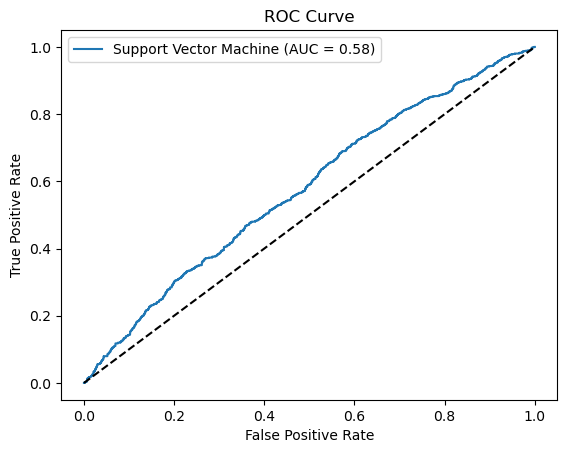

In [28]:
# initialize and train the model
svm = SVC(random_state=random_seed)
svm.fit(X_train, y_train)

# make predictions
y_pred = svm.predict(X_val)

y_pred_decision_svm = svm.decision_function(X_val)
svm_auc = roc_auc_score(y_val, y_pred_decision_svm)

svm_accuracy = accuracy_score(y_val, y_pred)
print("\nSVM Accuracy:", svm_accuracy)
print(classification_report(y_val, y_pred))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nSVM AUC:", svm_auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_decision_svm)

plt.plot(fpr, tpr, label=f'Support Vector Machine (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### K-Nearest Neighbors
<a id = 'ml-knn'></a>


KNN Accuracy: 0.6464723926380368
              precision    recall  f1-score   support

       False       0.64      0.65      0.65      1289
        True       0.65      0.64      0.65      1319

    accuracy                           0.65      2608
   macro avg       0.65      0.65      0.65      2608
weighted avg       0.65      0.65      0.65      2608


KNN Confusion Matrix
 [[844 445]
 [477 842]]

KNN AUC: 0.6973040087848954


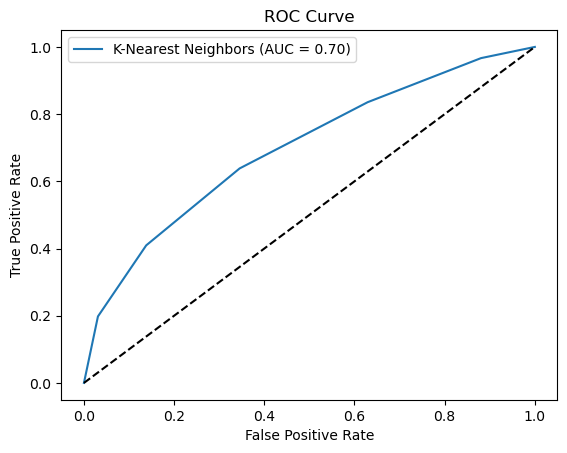

In [29]:
# initialize and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# make predictions
y_pred = knn.predict(X_val)

y_pred_proba_knn = knn.predict_proba(X_val)[:, 1]
knn_auc = roc_auc_score(y_val, y_pred_proba_knn)

knn_accuracy = accuracy_score(y_val, y_pred)
print("\nKNN Accuracy:", knn_accuracy)
print(classification_report(y_val, y_pred))
print("\nKNN Confusion Matrix\n", confusion_matrix(y_val, y_pred))
print("\nKNN AUC:", knn_auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_knn)

plt.plot(fpr, tpr, label=f'K-Nearest Neighbors (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### MLP Classifier (Neural Network)
<a id = 'ml-mlpc'></a>


MLP Accuracy: 0.7833588957055214
              precision    recall  f1-score   support

       False       0.82      0.72      0.77      1289
        True       0.75      0.85      0.80      1319

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608


MLP Confusion Matrix:
 [[ 926  363]
 [ 202 1117]]

MLP AUC-ROC: 0.8727131245842379


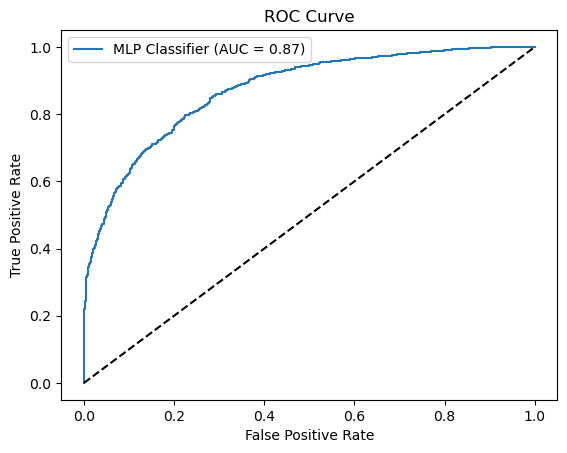

In [30]:
# initialize and train the model
mlp = MLPClassifier(random_state=random_seed)
mlp.fit(X_train, y_train)

# make predictions
y_pred = mlp.predict(X_val)

y_pred_proba_mlp = mlp.predict_proba(X_val)[:, 1]
mlp_auc = roc_auc_score(y_val, y_pred_proba_mlp)

mlp_accuracy = accuracy_score(y_val, y_pred)
print("\nMLP Accuracy:", mlp_accuracy)
print(classification_report(y_val, y_pred))
print("\nMLP Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nMLP AUC-ROC:", mlp_auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_mlp)

plt.plot(fpr, tpr, label=f'MLP Classifier (AUC = {mlp_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Model Evaluation
<a id = 'eval'></a>

In [31]:
logit_scores = cross_val_score(logit_model, X_train, y_train, cv=5, scoring='roc_auc')
tree_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='roc_auc')
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
gbc_scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring='roc_auc')
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='roc_auc')
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc')
mlp_scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='roc_auc')

print("Log AUC (cross-validation): ", logit_scores.mean())
print("\nDT AUC (cross-validation):  ", tree_scores.mean())
print("\nRF AUC (cross-validation):  ", rf_scores.mean())
print("\nGBC AUC (cross-validation): ", gbc_scores.mean())
print("\nXGB AUC (cross-validation): ", xgb_scores.mean())
print("\nSVM AUC (cross-validation): ", svm_scores.mean())
print("\nKNN AUC (cross-validation): ", knn_scores.mean())
print("\nMLP AUC (cross-validation): ", mlp_scores.mean())

Log AUC (cross-validation):  0.8736437509597254

DT AUC (cross-validation):   0.7435124145854987

RF AUC (cross-validation):   0.8807239070310315

GBC AUC (cross-validation):  0.8932013015361069

XGB AUC (cross-validation):  0.8839146256057641

SVM AUC (cross-validation):  0.564824991413256

KNN AUC (cross-validation):  0.6781258790302217

MLP AUC (cross-validation):  0.8605816192128855


### Hyperparameter Tuning
<a id = 'hpt'></a>

In [32]:
logit_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

logit_grid_search = GridSearchCV(logit_model, logit_param_grid, cv=5, scoring='roc_auc')
logit_grid_search.fit(X_train, y_train)

print("Best Logistic Regression Hyperparameters:", logit_grid_search.best_params_)
print("Best Logistic Regression AUC Score:", logit_grid_search.best_score_)


Best Logistic Regression Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression AUC Score: 0.873818762859508


In [33]:
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(rf, rf_param_dist, cv=5, scoring='roc_auc')
rf_random_search.fit(X_train, y_train)

print("Best Random Forest Hyperparameters:", rf_random_search.best_params_)
print("Best Random Forest AUC Score:", rf_random_search.best_score_)


Best Random Forest Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best Random Forest AUC Score: 0.8914517263492806


In [34]:
gbc_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

gbc_random_search = RandomizedSearchCV(gbc, gbc_param_dist, cv=5, scoring='roc_auc')
gbc_random_search.fit(X_train, y_train)

print("Best Gradient Boosting Hyperparameters:", gbc_random_search.best_params_)
print("Best Gradient Boosting AUC Score:", gbc_random_search.best_score_)

Best Gradient Boosting Hyperparameters: {'subsample': 0.7, 'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 3, 'learning_rate': 0.1}
Best Gradient Boosting AUC Score: 0.8933879327918962


In [35]:
X_train['CabinNum'] = X_train['CabinNum'].astype('category')
X_val['CabinNum'] = X_val['CabinNum'].astype('category')

xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_random_search = RandomizedSearchCV(xgb, xgb_param_dist, cv=5, scoring='roc_auc')
xgb_random_search.fit(X_train, y_train)

print("Best XGBoost Hyperparameters:", xgb_random_search.best_params_)
print("Best XGBoost Score:", xgb_random_search.best_score_)

X_train['CabinNum'] = X_train['CabinNum'].astype('object')
X_val['CabinNum'] = X_val['CabinNum'].astype('object')

Best XGBoost Hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best XGBoost Score: 0.8900049143610458


In [36]:
mlp_param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

mlp_random_search = RandomizedSearchCV(mlp, mlp_param_dist, cv=5, scoring='roc_auc')
mlp_random_search.fit(X_train, y_train)

print("Best MLP Hyperparameters:", mlp_random_search.best_params_)
print("Best MLP Score:", mlp_random_search.best_score_)

Best MLP Hyperparameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'tanh'}
Best MLP Score: 0.8792711358797906


In [37]:
# Logit model
best_logit = logit_grid_search.best_estimator_
best_logit.fit(X_train, y_train)
y_pred_logit = best_logit.predict(X_val)

y_prob_logit = best_logit.predict_proba(X_val)[:, 1]
auc_logit = roc_auc_score(y_val, y_prob_logit)

# random forest
best_rf = rf_random_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_val)

y_prob_rf = best_rf.predict_proba(X_val)[:, 1]
auc_rf = roc_auc_score(y_val, y_prob_rf)

# GBC
best_gbc = gbc_random_search.best_estimator_
best_gbc.fit(X_train, y_train)
y_pred_gbc = best_gbc.predict(X_val)

y_prob_gbc = best_gbc.predict_proba(X_val)[:, 1]
auc_gbc = roc_auc_score(y_val, y_prob_gbc)

# XGB
X_train['CabinNum'] = X_train['CabinNum'].astype('category')
X_val['CabinNum'] = X_val['CabinNum'].astype('category')

best_xgb = xgb_random_search.best_estimator_
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_val)

y_prob_xgb = best_xgb.predict_proba(X_val)[:, 1]
auc_xgb = roc_auc_score(y_val, y_prob_xgb)

X_train['CabinNum'] = X_train['CabinNum'].astype('object')
X_val['CabinNum'] = X_val['CabinNum'].astype('object')

# MLP
best_mlp = mlp_random_search.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred_mlp = best_mlp.predict(X_val)

y_prob_mlp = best_mlp.predict_proba(X_val)[:, 1]
auc_mlp = roc_auc_score(y_val, y_prob_mlp)

print("LR Accuracy: ", accuracy_score(y_val, y_pred_logit))
print("RF Accuracy: ", accuracy_score(y_val, y_pred_rf))
print("GBC Accuracy:", accuracy_score(y_val, y_pred_gbc))
print("XGB Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("MLP Accuracy:", accuracy_score(y_val, y_pred_mlp))

print("\nLR AUC: ", auc_logit)
print("RF AUC: ", auc_rf)
print("GBC AUC:", auc_gbc)
print("XGB AUC:", auc_xgb)
print("MLP AUC:", auc_mlp)

LR Accuracy:  0.7730061349693251
RF Accuracy:  0.7940950920245399
GBC Accuracy: 0.8002300613496932
XGB Accuracy: 0.7883435582822086
MLP Accuracy: 0.790260736196319

LR AUC:  0.8646381494784998
RF AUC:  0.8859613419903999
GBC AUC: 0.8914483725652
XGB AUC: 0.8786251074144023
MLP AUC: 0.880171110187032


## Model Selection
<a id = 'select'></a>

In [38]:
# predict on test data
y_test_pred = best_gbc.predict(X_test)
y_test_prob = best_gbc.predict_proba(X_test)[:, 1]

y_test_pred_rf = best_rf.predict(X_test)
y_test_prob_rf = best_rf.predict_proba(X_test)[:, 1]

final_test_data_gbc = test_data_raw.copy()
final_test_data_gbc['Transported'] = y_test_pred

final_test_data_rf = test_data_raw.copy()
final_test_data_rf['Transported'] = y_test_pred_rf

print(final_test_data_gbc.head())
print(final_test_data_rf.head())

final_test_data_gbc.to_csv('gbc_test.csv', index=False)
final_test_data_rf.to_csv('rf_test.csv', index=False)


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  \
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning   
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers   
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus   
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter   
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez   

   Transported  
0         True  
1        False  
2         True  
3         True  
4         True  
  Passen

## References

Howard, A., Chow, A., & Holbrook, R. (2022). _Spaceship Titanic_. Kaggle. Retrieved October 1, 2024, from https://www.kaggle.com/competitions/spaceship-titanic